In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.feature_extraction import DictVectorizer

# Présentation du data set

In [2]:
rawData = pd.read_csv("dataset/athlete_events.csv")

rawData.describe()

rawData.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


## Les variables


- ID : Identifiant unique pour chacun des athlètes
- Name : Nom de l'athlète
- Sex : Sexe de l'athlète (M ou F)
- Age : Age de l'athlète
- Height : Taille en centimètre de l'athlète
- Weight : Poids en kilogrammes de l'athlète
- Team : Nomm de l'équipe de l'athlète
- NOC : Identifiant en trois lettre des équipes
- Games : Année et saison des JO
- Year : Année de participation
- Season : "Summer" ou "Winter"
- City : Ville hôte
- Sport : Sport de l'épreuve
- Event : Nom e l'évènement
- Medal : Type de médaille remporté : Gold, Silver, Bronze, ou NA si rien n'a été gagné par l'athlète

### Variables utlisées dans le cadre de la résolution de la problématique
Les variables qui seront utlisées dans le cadre de la résolution de la problématique seront :
- Age
- Height
- Weight

Qui permettent de décrire physiquement l'athlète

- Sport

Pour catégoriser les athlètes

- Medal


Pour évaluer la réussite de l'athlète


### Descriptions graphiques des variables

#### Taille

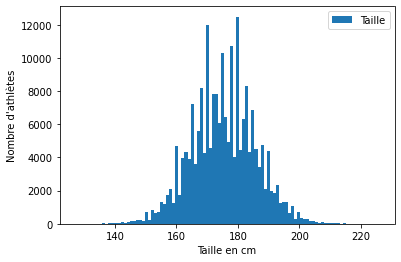

In [3]:
plt.hist(rawData["Height"], bins=100, label=['Taille'])
plt.legend(loc="upper right")
plt.xlabel('Taille en cm')
plt.ylabel("Nombre d'athlètes")
plt.show()

#### Poids

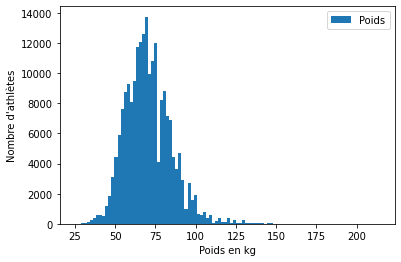

In [4]:
plt.hist(rawData["Weight"], bins=100, label=['Poids'])
plt.legend(loc="upper right")
plt.xlabel('Poids en kg')
plt.ylabel("Nombre d'athlètes")
plt.show()

#### Age

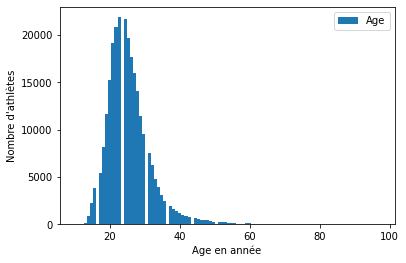

In [5]:
plt.hist(rawData["Age"], bins=100, label=['Age'])
plt.legend(loc="upper right")
plt.xlabel('Age en année')
plt.ylabel("Nombre d'athlètes")
plt.show()

# Préparation des données

Données qu'on considère comme ne pouvant pas être null à cause :

**Du non sens physique**
 - Age
 - Height
 - Weight
 - Sex


**Pour les besoins du process de traitement**
 - Sport

In [6]:
rawData.isnull()

print("Taille pré nettoyage :" + str(len(rawData)))

# Suppression des colonnes inutiles
rawData = rawData.drop(["ID","Name", "Team", "NOC", "Games", "Year", "Season", "City", "Event"], axis=1)

# Filtre sur les data null
clearData = rawData[(rawData["Height"].isnull() == False) & \
                    (rawData["Age"].isnull() == False) & \
                    (rawData["Weight"].isnull() == False) & \
                    (rawData["Sex"].isnull() == False) & \
                    (rawData["Sport"].isnull() == False)
                    ]
clearData = clearData.drop_duplicates()
print("Taille post nettoyage :" + str(len(clearData)))
print("Il y'a donc une perte de " + str(len(rawData) - len(clearData)))
clearData.head(15)

Taille pré nettoyage :271116
Taille post nettoyage :127492
Il y'a donc une perte de 143624


,Sex,Age,Height,Weight,Sport,Medal
0,M,24.0,180.0,80.0,Basketball,NaN
1,M,23.0,170.0,60.0,Judo,NaN
4,F,21.0,185.0,82.0,Speed Skating,NaN
6,F,25.0,185.0,82.0,Speed Skating,NaN
8,F,27.0,185.0,82.0,Speed Skating,NaN
10,M,31.0,188.0,75.0,Cross Country Skiing,NaN
14,M,33.0,188.0,75.0,Cross Country Skiing,NaN
18,M,31.0,183.0,72.0,Cross Country Skiing,NaN
22,M,33.0,183.0,72.0,Cross Country Skiing,NaN
28,M,26.0,186.0,96.0,Ice Hockey,NaN


# Normalisation des données

## Normalisation de la taille

In [7]:
#plt.hist(clearData["Height"], bins=100, label=['Taille'])
#plt.legend(loc="upper right")
#plt.show()

#normalisation de la taille 
clearData["Height"]=((clearData["Height"]-clearData["Height"].min())/(clearData["Height"].max()-clearData["Height"].min()))*1

#plt.hist(clearData["Height"], bins=100, label=['Taille'])
#plt.legend(loc="upper right")
#plt.show()

## Normalisation du poids

In [8]:
#plt.hist(clearData["Weight"], bins=100, label=['Poids'])
#plt.legend(loc="upper right")
#plt.show()

#normalisation du poids 
clearData["Weight"]=((clearData["Weight"]-clearData["Weight"].min())/(clearData["Weight"].max()-clearData["Weight"].min()))*1

#plt.hist(clearData["Weight"], bins=100, label=['Poids'])
#plt.legend(loc="upper right")
#plt.show()

## Normalisation de l'âge

In [9]:
#plt.hist(clearData["Age"], bins=60, label=['Age'])
#plt.legend(loc="upper right")
#plt.show()

#normalisation de l'age 
clearData["Age"]=((clearData["Age"]-clearData["Age"].min())/(clearData["Age"].max()-clearData["Age"].min()))*1

#plt.hist(clearData["Age"], bins=60, label=['Age'])
#plt.legend(loc="upper right")
#plt.show()

clearData.loc[(clearData["Medal"].isnull() == False)] 


,Sex,Age,Height,Weight,Sport,Medal
40,M,0.283333,0.575758,0.317460,Ice Hockey,Bronze
41,M,0.283333,0.484848,0.206349,Gymnastics,Bronze
42,M,0.283333,0.484848,0.206349,Gymnastics,Gold
50,M,0.350000,0.484848,0.206349,Gymnastics,Bronze
60,M,0.150000,0.494949,0.317460,Alpine Skiing,Gold
...,...,...,...,...,...,...
271049,M,0.333333,0.707071,0.359788,Rowing,Gold
271076,F,0.166667,0.414141,0.291005,Athletics,Gold
271078,F,0.233333,0.414141,0.291005,Athletics,Silver
271080,F,0.366667,0.414141,0.291005,Athletics,Bronze


# Encodage des valeurs non numériques

In [10]:
clearData.loc[(clearData["Medal"].isnull() == False), 'Medal'] = 1
clearData.loc[(clearData["Sex"]== "M"), 'Sex'] = 1
clearData.loc[(clearData["Sex"]== "F"), 'Sex'] = 0


# clearData.loc[(clearData["Medal"].isnull() == True), 'Medal'] = 0



# clearData.loc[(rawData["Medal"] != 0), 'Medal'] = 1


clearData[(clearData["Medal"]==1)]

,Sex,Age,Height,Weight,Sport,Medal
40,1,0.283333,0.575758,0.317460,Ice Hockey,1
41,1,0.283333,0.484848,0.206349,Gymnastics,1
42,1,0.283333,0.484848,0.206349,Gymnastics,1
50,1,0.350000,0.484848,0.206349,Gymnastics,1
60,1,0.150000,0.494949,0.317460,Alpine Skiing,1
...,...,...,...,...,...,...
271049,1,0.333333,0.707071,0.359788,Rowing,1
271076,0,0.166667,0.414141,0.291005,Athletics,1
271078,0,0.233333,0.414141,0.291005,Athletics,1
271080,0,0.366667,0.414141,0.291005,Athletics,1


In [11]:
# cor = clearData.corr()
# sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
# plt.show()
clearData.loc[(clearData["Medal"].isnull() == True), 'Medal'] = 0

clearData[(clearData["Medal"]==0)]

,Sex,Age,Height,Weight,Sport,Medal
0,1,0.216667,0.535354,0.291005,Basketball,0
1,1,0.200000,0.434343,0.185185,Judo,0
4,0,0.166667,0.585859,0.301587,Speed Skating,0
6,0,0.233333,0.585859,0.301587,Speed Skating,0
8,0,0.266667,0.585859,0.301587,Speed Skating,0
...,...,...,...,...,...,...
271105,1,0.200000,0.414141,0.269841,Hockey,0
271106,1,0.266667,0.414141,0.269841,Hockey,0
271110,0,0.366667,0.444444,0.232804,Basketball,0
271111,1,0.300000,0.525253,0.338624,Luge,0


In [12]:
X = clearData["Sport"].tolist()

label_encoder = LabelEncoder()
X_labels = label_encoder.fit_transform("|".join(X).split("|"))

clearData["Sport"] = X_labels
clearData.head(15)

,Sex,Age,Height,Weight,Sport,Medal
0,1,0.216667,0.535354,0.291005,6,0
1,1,0.200000,0.434343,0.185185,26,0
4,0,0.166667,0.585859,0.301587,43,0
6,0,0.233333,0.585859,0.301587,43,0
8,0,0.266667,0.585859,0.301587,43,0
10,1,0.333333,0.616162,0.264550,12,0
14,1,0.366667,0.616162,0.264550,12,0
18,1,0.333333,0.565657,0.248677,12,0
22,1,0.366667,0.565657,0.248677,12,0
28,1,0.250000,0.595960,0.375661,25,0


# Prédiction des conditions physiques permettant d'accéder au podium

In [13]:
print("Nombre de médaillés : " + str(len(clearData[clearData["Medal"] == 1])))

print("Nombre de non-médaillés : " + str(len(clearData[clearData["Medal"] == 0])))

Nombre de médaillés : 27872
Nombre de non-médaillés : 99620


In [14]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

reglog = LogisticRegression(solver="lbfgs", penalty="none", max_iter=300)

X = clearData.drop(["Medal"], axis=1)
Y = clearData["Medal"].astype(int)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, shuffle=True, train_size=0.8, random_state=42)


reglog = reglog.fit(X_train, Y_train)

print('Coefficients: ', reglog.coef_)

predicted_classes = reglog.predict(X_test)
accuracy = accuracy_score(Y_test,predicted_classes)

print('Accuracy (%): ', accuracy * 100)

print(classification_report(Y_test,predicted_classes))

Coefficients:  [[-0.34511122 -0.40424983  1.70978223  0.54832979  0.0039387 ]]
Accuracy (%):  78.0579630573748
              precision    recall  f1-score   support

           0       0.78      1.00      0.88     19904
           1       0.00      0.00      0.00      5595

    accuracy                           0.78     25499
   macro avg       0.39      0.50      0.44     25499
weighted avg       0.61      0.78      0.68     25499



/home/theo/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/theo/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/theo/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [50]:
lenCD = int(len(clearData[clearData.Medal == 1])*0.65)

sampleData = pd.concat([clearData[clearData.Medal == 1], clearData[clearData.Medal == 0].sample(lenCD)])

reglog = LogisticRegression(solver="lbfgs", penalty="none", max_iter=300)

X = sampleData.drop(["Medal"], axis=1)
Y = sampleData["Medal"].astype(int)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, shuffle=True, train_size=0.8, random_state=42)


reglog = reglog.fit(X_train, Y_train)

print('Coefficients: ', reglog.coef_)

predicted_classes = reglog.predict(X_test)
accuracy = accuracy_score(Y_test,predicted_classes)

print('Accuracy (%): ', accuracy * 100)

print(classification_report(Y_test,predicted_classes))

Coefficients:  [[-0.3281155  -0.4709259   1.78627192  0.46135788  0.00374539]]
Accuracy (%):  60.79582517938682
              precision    recall  f1-score   support

           0       0.52      0.02      0.04      3612
           1       0.61      0.99      0.75      5586

    accuracy                           0.61      9198
   macro avg       0.56      0.50      0.40      9198
weighted avg       0.57      0.61      0.47      9198

